In [1]:
# must run in an environment where polarityjam is installed
from polarityjam import Extractor, Plotter, CellposeSegmenter, PropertiesCollection
from polarityjam import RuntimeParameter, PlotParameter, SegmentationParameter, ImageParameter
from polarityjam.utils.io import read_image

from pathlib import Path
import os

/home/jpa/Programs/anaconda3/envs/polarityjam/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_path = "/home/jpa/tmp/polarityjam_out/"

In [3]:
# read input
infile = "/home/jpa/tmp/polarityjam/data/golgi_nuclei/set_1/060721_EGM2_18dyn_01.tif"
fileout_name = "060721_EGM2_18dyn_01"
img = read_image(infile)

# describe your image with ImageParameter
params_image = ImageParameter()

# set the channels
params_image.channel_organelle = 0
params_image.channel_nucleus = 2
params_image.channel_junction = 3
params_image.channel_expression_marker = 3

print(params_image)

ImageParameter:  
channel_junction              3                                       
channel_nucleus               2                                       
channel_organelle             0                                       
channel_expression_marker     3                                       



In [4]:
# define other parameters, use default values or use a yml file for it
params_runtime = RuntimeParameter()
params_seg = SegmentationParameter()
params_plot = PlotParameter()

#params_input = InputParameter.from_yml(path_to_yml)

In [5]:
# look at our params to check them
print(params_runtime)

RuntimeParameter:  
membrane_thickness            5                                       
feature_of_interest           cell_area                               
min_cell_size                 50                                      
min_nucleus_size              10                                      
min_organelle_size            10                                      
dp_epsilon                    5                                       



In [6]:
# Define your segmenter and segment your image
s = CellposeSegmenter(params_seg)
img_seg, img_seg_params = s.prepare(img, params_image)


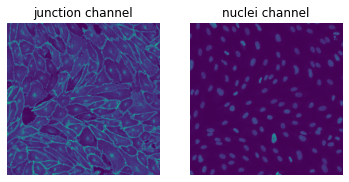

In [7]:
# Define a plotter and check your image that is prepared for segmentation
p = Plotter(params_plot)

# plot input
p.plot_channels(img_seg, img_seg_params, output_path, infile)

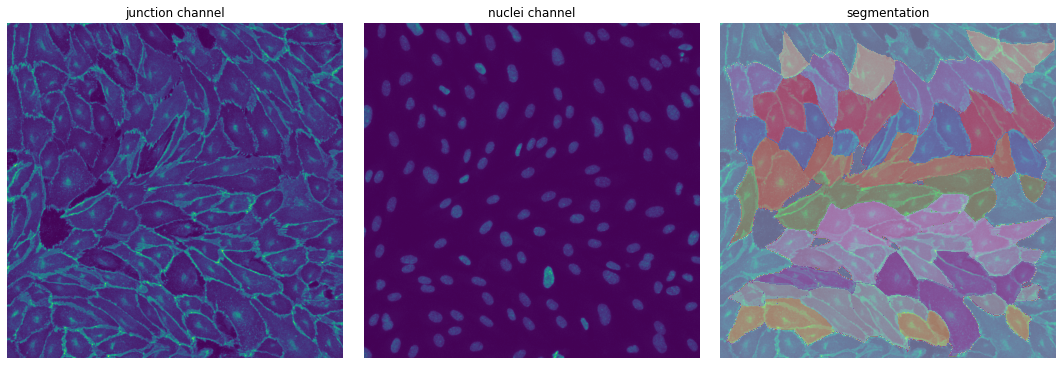

In [8]:
# segment your image
mask = s.segment(img_seg, infile)

# plot segmentation mask to check the quality
p.plot_mask(mask, img_seg, img_seg_params, output_path, fileout_name)

In [9]:
# feature extraction
c = PropertiesCollection()
e = Extractor(params_runtime)
e.extract(img, params_image, mask, fileout_name, output_path, c)

In [10]:
c.dataset.head()

,filename,label,cell_X,cell_Y,cell_shape_orientation,cell_major_axis_length,cell_minor_axis_length,cell_eccentricity,cell_major_to_minor_ratio,cell_area,...,morans_p_norm,neighbors_cell,neighbors_mean_dif_1st,neighbors_median_dif_1st,neighbors_stddev_dif_1st,neighbors_range_dif_1st,neighbors_mean_dif_2nd,neighbors_median_dif_2nd,neighbors_stddev_dif_2nd,neighbors_range_dif_2nd
1,060721_EGM2_18dyn_01,17.0,68.477653,804.993960,2.525143,114.164720,69.789749,0.791393,1.635838,5795.0,...,0.096469,3.0,-499.333333,-265.0,855.157036,2055.0,2421.250000,2092.0,3161.303637,7365.0
2,060721_EGM2_18dyn_01,18.0,112.365152,216.717906,1.772854,131.758840,79.042332,0.800074,1.666940,7260.0,...,0.096469,4.0,830.500000,1023.5,997.362647,2629.0,1808.666667,1028.0,3788.546540,11784.0
3,060721_EGM2_18dyn_01,19.0,88.122335,962.746247,0.031579,118.404769,67.778780,0.819952,1.746930,5395.0,...,0.096469,1.0,-1244.000000,-1244.0,0.000000,0.0,267.500000,267.5,132.500000,265.0
4,060721_EGM2_18dyn_01,20.0,155.107352,459.765362,1.453797,157.325719,138.722923,0.471705,1.134100,16404.0,...,0.096469,4.0,-6958.750000,-6791.0,2145.264713,5777.0,-10233.000000,-10853.0,1680.279739,5444.0
5,060721_EGM2_18dyn_01,21.0,107.061672,906.465671,2.409574,144.501883,37.908917,0.964975,3.811818,4151.0,...,0.096469,3.0,1422.333333,1379.0,166.149197,400.0,5066.000000,5066.0,3011.000000,6022.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


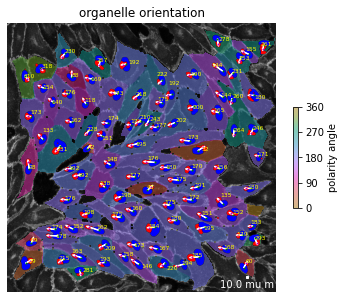

In [11]:
# plot the organelle polarity of a specific image in your collection
p.plot_organelle_polarity(c, "060721_EGM2_18dyn_01")  # image is automatically saved in outputpath

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


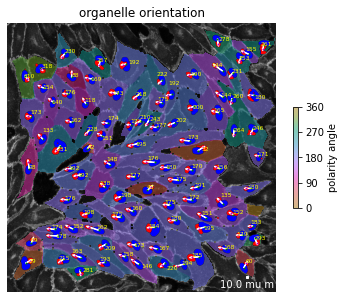

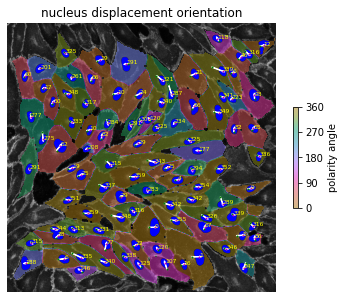

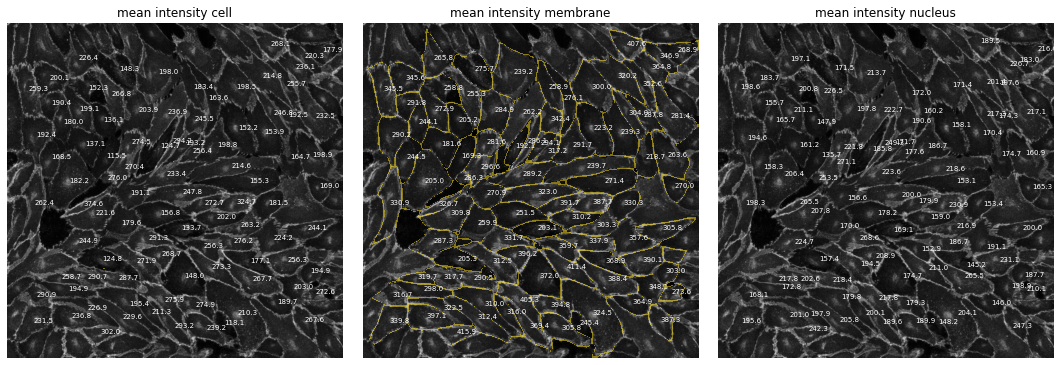

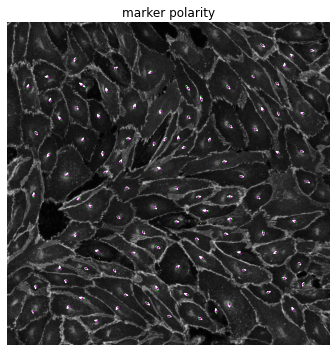

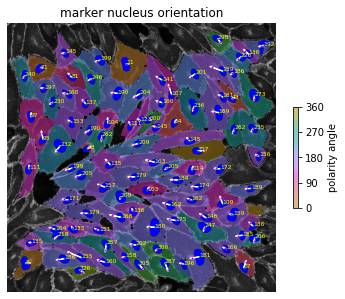

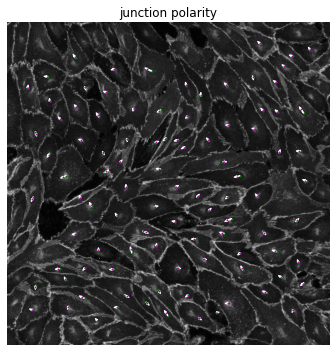

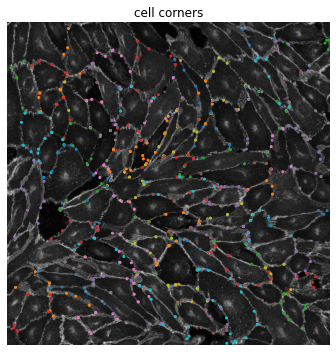

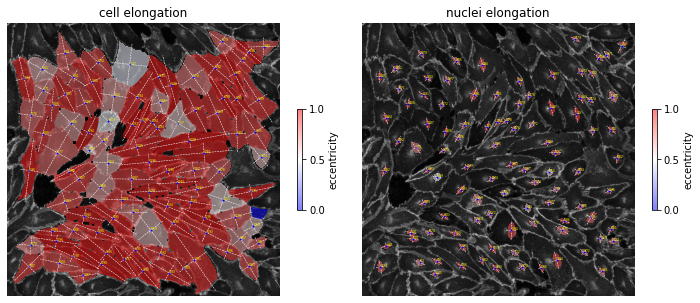

In [12]:
p.plot_collection(c)